In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#setting plot size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [5]:
df_clc = {}
df_clc[0] = pd.read_csv('AMZN.csv')
df_clc[1] = pd.read_csv('RELIANCE.NS.csv')
df_clc[2] = pd.read_csv('TATAMOTORS.NS.csv')

df_idx = ["AMAZON","RELIANCE","TATAMOTORS"]

In [6]:
for i in range(0,3):
     print(df_idx[i])
     print(df_clc[i])
     print("\n")

AMAZON
           Date         Open         High  ...        Close    Adj Close    Volume
0    2011-06-06   189.740005   191.759995  ...   186.529999   186.529999   7947700
1    2011-06-13   186.809998   192.449997  ...   186.369995   186.369995  26501200
2    2011-06-20   185.960007   195.199997  ...   192.550003   192.550003  18368100
3    2011-06-27   194.500000   210.270004  ...   209.490005   209.490005  22991700
4    2011-07-04   208.759995   218.320007  ...   218.279999   218.279999  13045600
..          ...          ...          ...  ...          ...          ...       ...
518  2021-05-10  3282.320068  3283.000000  ...  3222.899902  3222.899902  22067100
519  2021-05-17  3245.929932  3312.000000  ...  3203.080078  3203.080078  15970100
520  2021-05-24  3215.500000  3295.729980  ...  3223.070068  3223.070068  12958900
521  2021-05-31  3243.500000  3250.979980  ...  3206.219971  3206.219971   9088500
522  2021-06-07  3197.330078  3297.580078  ...  3281.149902  3281.149902   80823

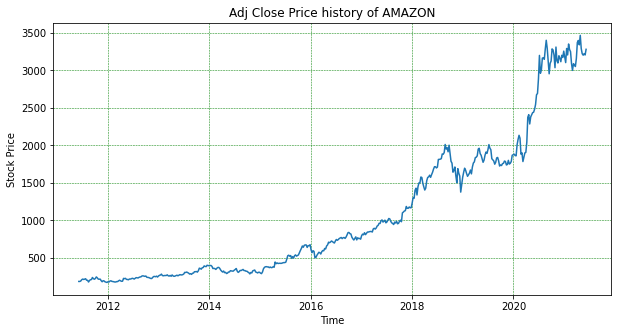

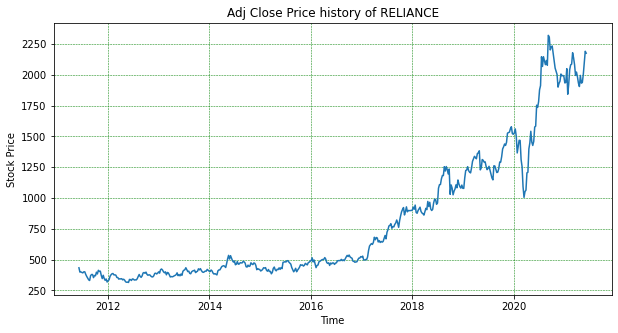

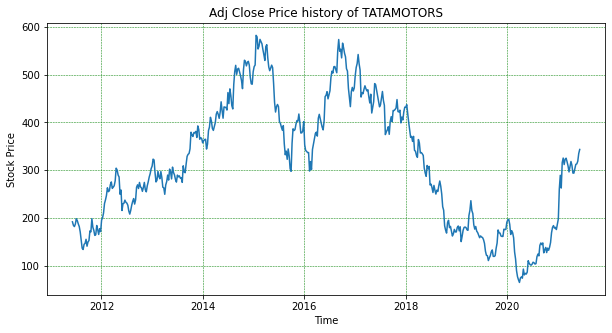

In [7]:
for i in range(0,3):
     df = df_clc[i]

     #setting index as date
     df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
     df.index = df['Date']
     
     #Ploting Adj Close Price history
     plt.plot(df['Adj Close'])
     plt.title("Adj Close Price history of " + df_idx[i])
     plt.xlabel("Time")
     plt.ylabel("Stock Price")
     plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
     plt.show()
     print("\n")

# Moving Average


 RMSE value on validation set:
1178.6288955884472


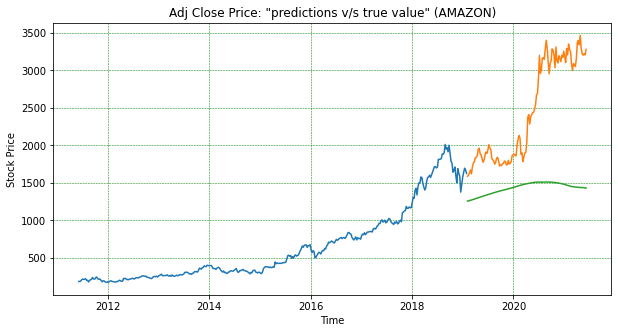




 RMSE value on validation set:
767.0238853357566


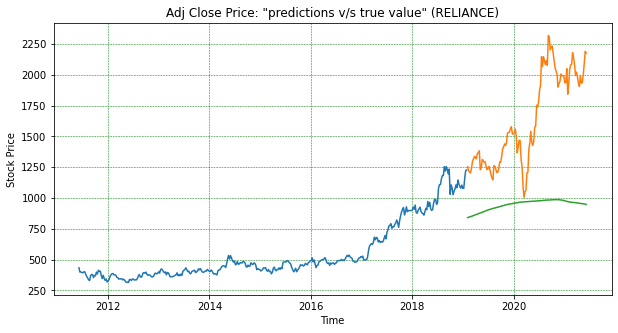




 RMSE value on validation set:
165.59480247143978


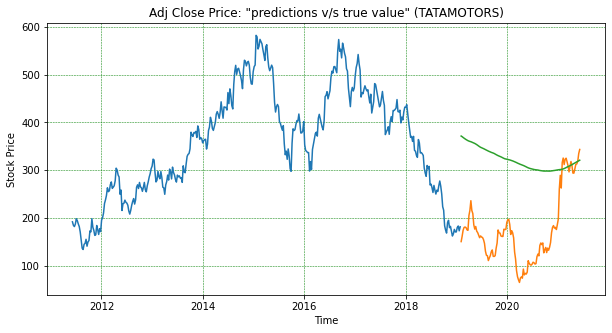

In [8]:
for i in range(0,3):
     df = df_clc[i]

     #creating dataframe with date and the target variable
     new_data = df[['Date','Adj Close']].copy()

     # splitting new_data into train and validation data
     train = new_data[:400].copy()
     valid = new_data[400:].copy()

     # making predictions
     preds = []
     for k in range(0,valid.shape[0]):
         a = train['Adj Close'][len(train)-123+k:].sum() + sum(preds)
         b = a/123
         preds.append(b)

     # calculating error
     rmse=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
     print('\n RMSE value on validation set:')
     print(rmse)

     # ploting the predictions v/s true value  
     valid.loc[:,'Predictions'] = preds
     plt.plot(train['Adj Close'])
     plt.plot(valid[['Adj Close', 'Predictions']])
     plt.title("Adj Close Price: \"predictions v/s true value\" ("+df_idx[i]+")")
     plt.xlabel("Time")
     plt.ylabel("Stock Price")
     plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
     plt.show()
     print("\n")

# Linear Regression

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app



 RMSE value on validation set:
989.3123083145618


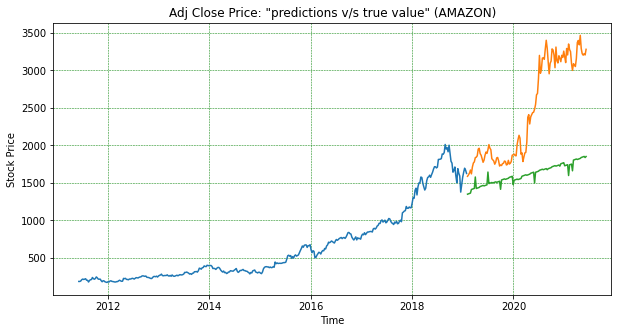




 RMSE value on validation set:
726.0985588053597


/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


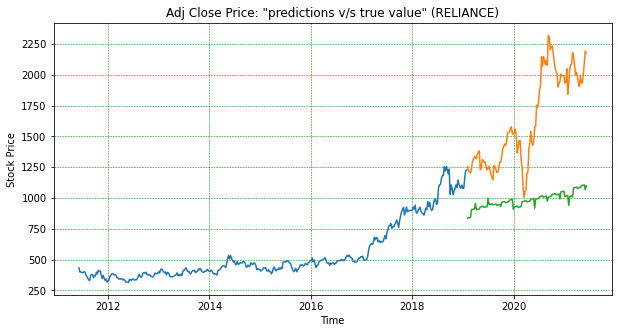




 RMSE value on validation set:
287.84419740739656


/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


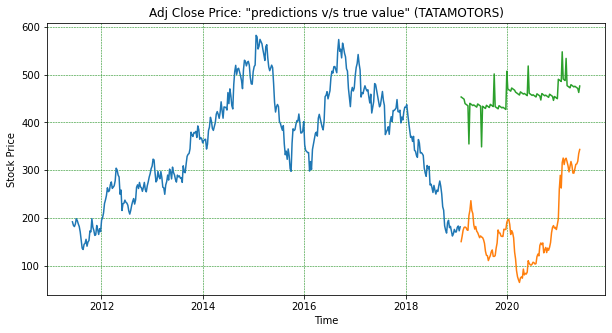

In [9]:
for i in range(0,3):
    df = df_clc[i]

    #creating dataframe with date and the target variable
    new_data = df[['Date','Adj Close']].copy()

    #creating features
    from fastai.tabular import add_datepart
    add_datepart(new_data, 'Date')
    new_data.drop('Elapsed', axis=1, inplace=True)

    new_data['mon_fri'] = 0
    for j in range(0,len(new_data)):
        if (new_data['Dayofweek'][j] == 0 or new_data['Dayofweek'][j] == 4):
            new_data['mon_fri'][j] = 1
        else:
            new_data['mon_fri'][j] = 0
    
    #splitting into train and validation datasets
    train = new_data[:400].copy()
    valid = new_data[400:].copy()

    y_train = train['Adj Close']
    x_train = train.drop('Adj Close', axis=1)
    y_valid = valid['Adj Close']
    x_valid = valid.drop('Adj Close', axis=1)

    #implementing linear regression model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)

    # calculating error
    preds = model.predict(x_valid)
    rmse=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('\n RMSE value on validation set:')
    print(rmse)

    # ploting the predictions v/s true value  
    valid.loc[:,'Predictions'] = preds
    valid.index = df[400:].index
    train.index = df[:400].index
    plt.plot(train['Adj Close'])
    plt.plot(valid[['Adj Close', 'Predictions']])
    plt.title("Adj Close Price: \"predictions v/s true value\" ("+df_idx[i]+")")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()
    print("\n")

# k-Nearest Neighbours

In [10]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app



 RMSE value on validation set:
1926.963515545399


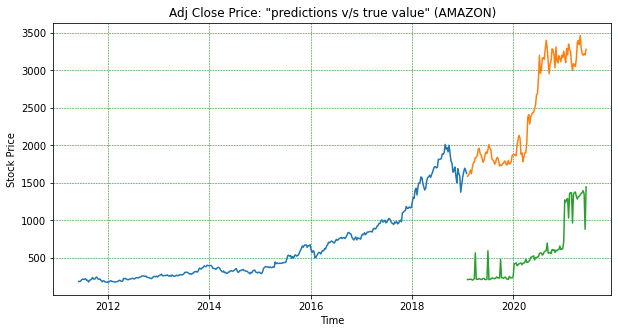

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app



 RMSE value on validation set:
1171.1714763308082


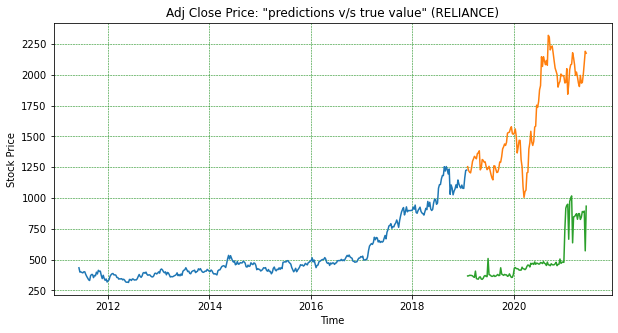

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app



 RMSE value on validation set:
216.11588620148456


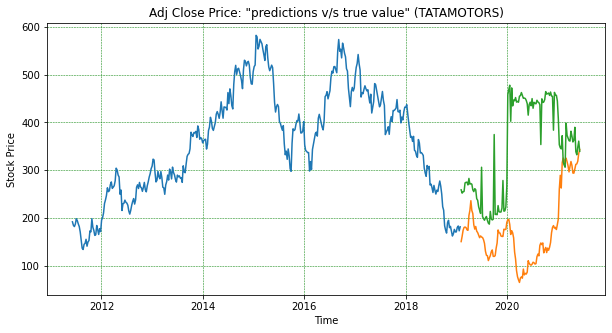

In [11]:
for i in range(0,3):
    df = df_clc[i]

    #creating dataframe with date and the target variable
    new_data = df[['Date','Adj Close']].copy()

    #creating features
    from fastai.tabular import add_datepart
    add_datepart(new_data, 'Date')
    new_data.drop('Elapsed', axis=1, inplace=True)

    new_data['mon_fri'] = 0
    for j in range(0,len(new_data)):
        if (new_data['Dayofweek'][j] == 0 or new_data['Dayofweek'][j] == 4):
            new_data['mon_fri'][j] = 1
        else:
            new_data['mon_fri'][j] = 0
    
    #splitting into train and validation
    train = new_data[:400].copy()
    valid = new_data[400:].copy()

    x_train = train.drop('Adj Close', axis=1)
    y_train = train['Adj Close']
    x_valid = valid.drop('Adj Close', axis=1)
    y_valid = valid['Adj Close']

    #scaling data
    x_train_scaled = scaler.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(x_valid)
    x_valid = pd.DataFrame(x_valid_scaled)

    #using gridsearch to find the best parameter
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)

    #making predictions
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)

    # calculating error
    rmse=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('\n RMSE value on validation set:')
    print(rmse)

    # ploting the predictions v/s true value  
    valid.loc[:,'Predictions'] = preds
    valid.index = df[400:].index
    train.index = df[:400].index
    plt.plot(train['Adj Close'])
    plt.plot(valid[['Adj Close', 'Predictions']])
    plt.title("Adj Close Price: \"predictions v/s true value\" ("+df_idx[i]+")")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()
    print("\n")

# Prophet

In [12]:
#importing prophet
from fbprophet import Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 RMSE value on validation set:
735.0712968256096


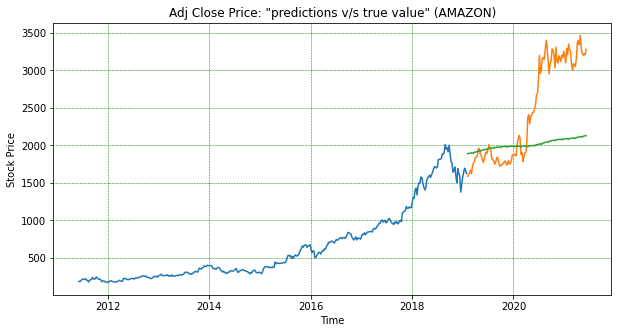

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 RMSE value on validation set:
475.9320502162486


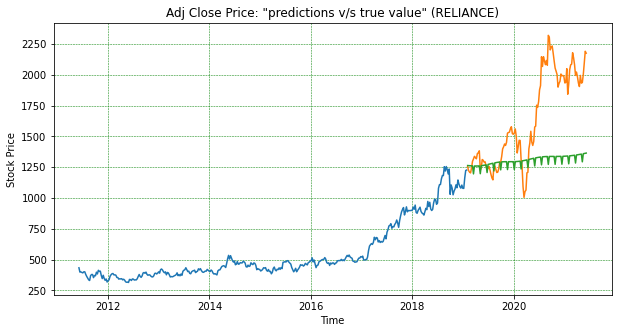

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 RMSE value on validation set:
91.33527357698752


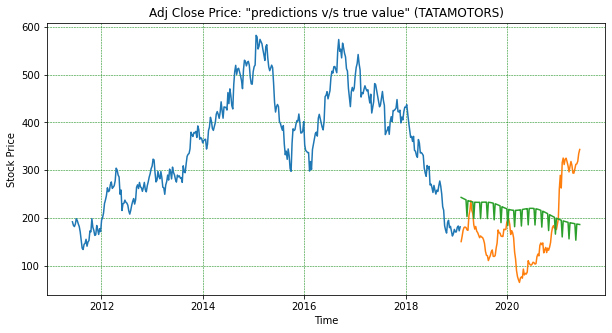

In [14]:
for i in range(0,3):
    df = df_clc[i]

    #creating dataframe with date and the target variable
    new_data = df[['Date','Adj Close']].copy()
    new_data.index = new_data.Date

    #preparing data
    new_data.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)

    #splitting into train and validation datasets
    train = new_data[:400].copy()
    valid = new_data[400:].copy()

    #fit the model
    model = Prophet(weekly_seasonality=True)
    model.fit(train)

    #making predictions
    Adj_Close_prices = model.make_future_dataframe(periods=len(valid))
    forecast = model.predict(Adj_Close_prices)

    #calculating error
    preds = forecast['yhat'][400:]
    rmse=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(preds)),2)))
    print('\n RMSE value on validation set:')
    print(rmse)

    # ploting the predictions v/s true value  
    valid.loc[:,'Predictions'] = preds.values
    valid.index = df[400:].index
    train.index = df[:400].index
    plt.plot(train['y'])
    plt.plot(valid[['y', 'Predictions']])
    plt.title("Adj Close Price: \"predictions v/s true value\" ("+df_idx[i]+")")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()
    print("\n")



# Long Short Term Memory (LSTM)

In [15]:
#importing libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

340/340 - 11s - loss: 0.0023

 RMSE value on validation set:
183.39605781752155


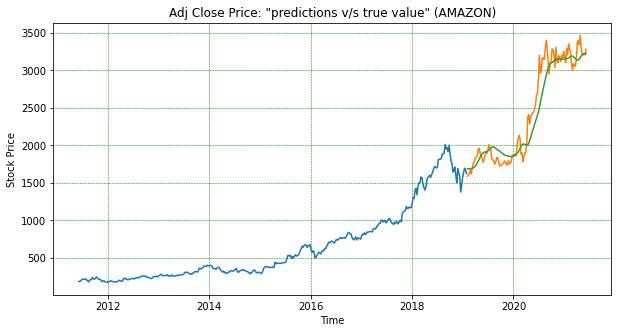



340/340 - 11s - loss: 0.0016

 RMSE value on validation set:
174.30599061608956


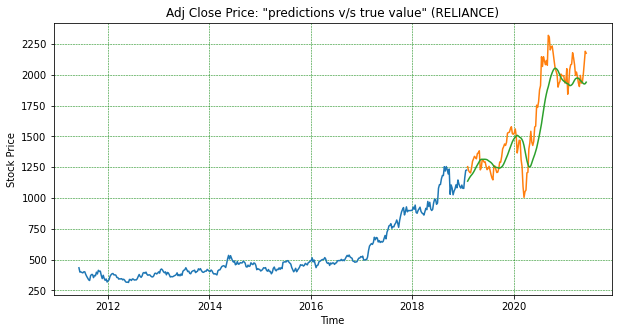



340/340 - 11s - loss: 0.0130

 RMSE value on validation set:
33.18272447611932


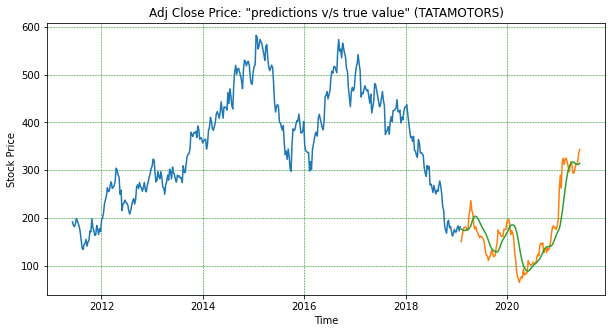

In [23]:
for i in range(0,3):
    df = df_clc[i]
    
    #creating dataframe with date and the target variable
    new_data = df[['Date','Adj Close']].copy()
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    #splitting into train and validation datasets
    dataset = new_data.values

    train = dataset[0:400,:]
    valid = dataset[400:,:]

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    x_train, y_train = [], []
    for j in range(60,len(train)):
        x_train.append(scaled_data[j-60:j,0])
        y_train.append(scaled_data[j,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    # making predictions
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    
    X_valid = []
    for k in range(60,inputs.shape[0]):
        X_valid.append(inputs[k-60:k,0])
    X_valid = np.array(X_valid)

    X_valid = np.reshape(X_valid, (X_valid.shape[0],X_valid.shape[1],1))
    preds = model.predict(X_valid)
    preds = scaler.inverse_transform(preds)

    # Calculating Error
    rmse=np.sqrt(np.mean(np.power((valid-preds),2)))
    print('\n RMSE value on validation set:')
    print(rmse)


    # ploting the predictions v/s true value
    train = new_data[:400].copy()
    valid = new_data[400:].copy()  
    valid.loc[:,'Predictions'] = preds
    valid.index = df[400:].index
    train.index = df[:400].index
    plt.plot(train['Adj Close'])
    plt.plot(valid[['Adj Close', 'Predictions']])
    plt.title("Adj Close Price: \"predictions v/s true value\" ("+df_idx[i]+")")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()
    print("\n")